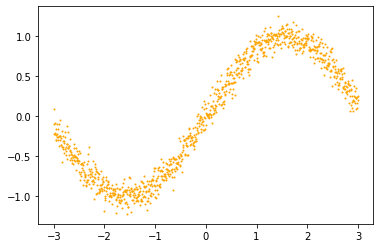

In [1]:
import numpy as np

X = np.linspace(-3, 3, 1000).reshape(-1, 1)
y = np.sin(X)
noise = np.random.randn(1000, 1)*0.1
y += noise

import matplotlib.pyplot as plt

plt.scatter(X.ravel(), y, s=1, c='orange')
plt.show()

# 시퀀셜 API

In [2]:
from tensorflow import keras

model = keras.models.Sequential([
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(1)
])

model.compile(optimizer='rmsprop', loss='mse', metrics=['mse'])
history = model.fit(X.reshape(-1, 1), y.reshape(-1, 1), epochs=100, verbose=False)

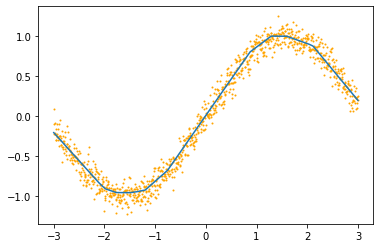

In [3]:
pred = model(X.astype(np.float32))
plt.scatter(X.ravel(), y, s=1, c='orange')
plt.plot(X.ravel(), pred.numpy().ravel())
plt.show()

# 함수형 API

In [7]:
input_ = keras.layers.Input(shape=(1,))
x = keras.layers.Dense(16, activation='relu')(input_)
x = keras.layers.Dense(1)(x)
model = keras.models.Model(input_, x)

model.compile(optimizer='rmsprop', loss='mse', metrics=['mse'])
history = model.fit(X.reshape(-1, 1), y.reshape(-1, 1), epochs=100, verbose=False)

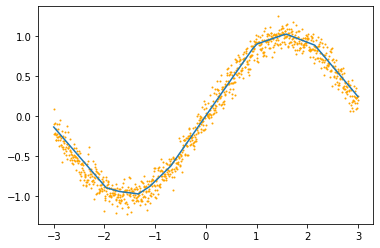

In [8]:
pred = model(X.astype(np.float32))
plt.scatter(X.ravel(), y, s=1, c='orange')
plt.plot(X.ravel(), pred.numpy().ravel())
plt.show()

각 `layer`는 입력 텐서에 변환을 수행합니다. `model`은 `layer`를 모아놓은 것입니다.

In [6]:
import tensorflow as tf

dense_layer1 = keras.layers.Dense(16, activation='relu')
dense_layer2 = keras.layers.Dense(1)

input_ = keras.layers.Input(shape=(1,))
x = dense_layer1(input_)
x = dense_layer2(x)
model = keras.models.Model(input_, x)

sample = tf.random.normal([4, 1])
x = dense_layer1(sample)
x = dense_layer2(x)
x == model(sample)

<tf.Tensor: shape=(4, 1), dtype=bool, numpy=
array([[ True],
       [ True],
       [ True],
       [ True]])>